# Initial Exploratory Data Analysis (EDA)

In this section, we will perform an initial exploratory data analysis (EDA) on the TMDB movie dataset. This includes loading the dataset, cleaning the data, and visualizing key features to understand the distribution and relationships within the data.

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors

In [207]:
df = pd.read_csv("./data/TMDB_movie_dataset_v11.csv")
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [208]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

## Cleaning and Extracting Relevant Features

In [209]:
df = df[["imdb_id", "title", "vote_average", "vote_count", "release_date", "adult", "overview", "genres", "keywords", "poster_path", "production_companies", "tagline"]]

In [210]:
df.isna().sum()

imdb_id                  560684
title                        13
vote_average                  0
vote_count                    0
release_date             202010
adult                         0
overview                 242810
genres                   475846
keywords                 858466
poster_path              376408
production_companies     646233
tagline                 1007586
dtype: int64

In [211]:
df = df.dropna(subset=[col for col in df.columns if col != "imdb_id"])

In [212]:
df.head()

,imdb_id,title,vote_average,vote_count,release_date,adult,overview,genres,keywords,poster_path,production_companies,tagline
0,tt1375666,Inception,8.364,34495,2010-07-15,False,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Your mind is the scene of the crime.
1,tt0816692,Interstellar,8.417,32571,2014-11-05,False,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"Legendary Pictures, Syncopy, Lynda Obst Produc...",Mankind was born on Earth. It was never meant ...
2,tt0468569,The Dark Knight,8.512,30619,2008-07-16,False,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"DC Comics, Legendary Pictures, Syncopy, Isobel...",Welcome to a world without rules.
3,tt0499549,Avatar,7.573,29815,2009-12-15,False,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"Dune Entertainment, Lightstorm Entertainment, ...",Enter the world of Pandora.
4,tt0848228,The Avengers,7.710,29166,2012-04-25,False,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Marvel Studios,Some assembly required.


## Visualizing rating distributions

c:\Users\Brendan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


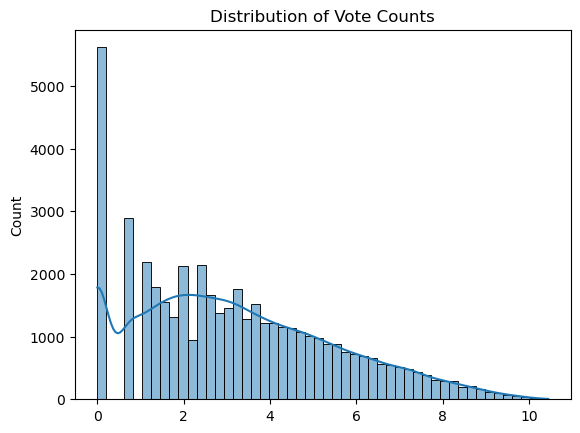

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df[df["vote_count"] > 0]
log_vote_count = np.log(df["vote_count"])
sns.histplot(log_vote_count, bins=50, kde=True)
plt.title("Distribution of Vote Counts")
plt.xlabel("")
plt.show()

c:\Users\Brendan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


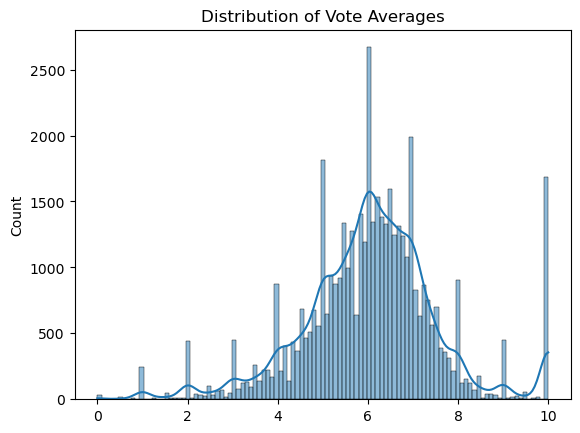

In [214]:
sns.histplot(df["vote_average"], kde=True)
plt.title("Distribution of Vote Averages")
plt.xlabel("")
plt.show()

In [215]:
df["vote_average"].describe()

count    46844.000000
mean         6.065172
std          1.529408
min          0.000000
25%          5.200000
50%          6.098500
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

In [216]:
df.to_csv("./data/movie_data_v1.csv")

In [217]:
df = pd.read_csv("./data/movie_data_v1.csv")
df = df.drop(columns=["Unnamed: 0", "overview", "adult"])


In [218]:
m = df["vote_count"].quantile(0.95)

In [219]:
m

1738.8499999999985

In [220]:
df = df[df["vote_count"] >= m]
df

,imdb_id,title,vote_average,vote_count,release_date,genres,keywords,poster_path,production_companies,tagline
0,tt1375666,Inception,8.364,34495,2010-07-15,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Your mind is the scene of the crime.
1,tt0816692,Interstellar,8.417,32571,2014-11-05,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"Legendary Pictures, Syncopy, Lynda Obst Produc...",Mankind was born on Earth. It was never meant ...
2,tt0468569,The Dark Knight,8.512,30619,2008-07-16,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"DC Comics, Legendary Pictures, Syncopy, Isobel...",Welcome to a world without rules.
3,tt0499549,Avatar,7.573,29815,2009-12-15,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"Dune Entertainment, Lightstorm Entertainment, ...",Enter the world of Pandora.
4,tt0848228,The Avengers,7.710,29166,2012-04-25,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Marvel Studios,Some assembly required.
...,...,...,...,...,...,...,...,...,...,...
2338,tt0240890,Serendipity,6.900,1741,2001-10-05,"Comedy, Romance, Drama","new love, soulmates, dollar, fate, destiny, ch...",/srCE5lEIjVEG5eqWg9JcjZCK1aQ.jpg,"Tapestry Films, Miramax, Simon Fields Productions",Sometimes True Love Can Have More Than One Face.
2339,tt0889573,The Switch,6.241,1741,2010-05-11,"Comedy, Romance, Drama","new york city, pregnancy, hypochondriac, littl...",/6cfRJjF9llCQHdFrAjusidtAg45.jpg,"Mandate Pictures, Bona Fide Productions, Echo ...",The most unexpected comedy ever conceived.
2340,tt2140619,Two Night Stand,6.423,1740,2014-09-26,"Romance, Comedy","new year's eve, new york city, snowstorm, one-...",/rz0YnlHieXP9SBuJU4ANBW8ttIw.jpg,"Demarest Films, Flynn Picture Company",Before love. After sex.
2341,tt0092965,Empire of the Sun,7.513,1740,1987-12-09,"Drama, History, War","based on novel or book, shanghai, china, stadi...",/gEaCzjwHoPgyQFcwHql7o5YLHAU.jpg,"Amblin Entertainment, Warner Bros. Pictures","To survive in a world at war, he must find a s..."


## Feature Engineering

Using IMDB"s weighted rating we can get a more statistically significant value to quantify each movie"s ratings.

In [221]:
C = df["vote_average"].mean()
def weighted_score(df):
    v = df["vote_count"]
    R = df["vote_average"]

    return ((v/(v+m)) * R) + ((m/(v+m)) * C)

In [222]:
df["weighted_rating"] = df.apply(weighted_score, axis=1)
df["weighted_rating"]

0       8.293550
1       8.339913
2       8.425158
3       7.535691
4       7.664199
          ...   
2338    6.897988
2339    6.568285
2340    6.659409
2341    7.204589
2342    6.156955
Name: weighted_rating, Length: 2343, dtype: float64

In [223]:
df = df.drop(columns=["vote_average", "vote_count"])

In [224]:
df.head()

,imdb_id,title,release_date,genres,keywords,poster_path,production_companies,tagline,weighted_rating
0,tt1375666,Inception,2010-07-15,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Your mind is the scene of the crime.,8.293550
1,tt0816692,Interstellar,2014-11-05,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"Legendary Pictures, Syncopy, Lynda Obst Produc...",Mankind was born on Earth. It was never meant ...,8.339913
2,tt0468569,The Dark Knight,2008-07-16,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"DC Comics, Legendary Pictures, Syncopy, Isobel...",Welcome to a world without rules.,8.425158
3,tt0499549,Avatar,2009-12-15,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"Dune Entertainment, Lightstorm Entertainment, ...",Enter the world of Pandora.,7.535691
4,tt0848228,The Avengers,2012-04-25,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Marvel Studios,Some assembly required.,7.664199


In [225]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_year"] = df["release_date"].dt.year
df["release_year"]
df = df.drop(columns=["release_date"])
df.head()

,imdb_id,title,genres,keywords,poster_path,production_companies,tagline,weighted_rating,release_year
0,tt1375666,Inception,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Your mind is the scene of the crime.,8.293550,2010
1,tt0816692,Interstellar,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"Legendary Pictures, Syncopy, Lynda Obst Produc...",Mankind was born on Earth. It was never meant ...,8.339913,2014
2,tt0468569,The Dark Knight,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"DC Comics, Legendary Pictures, Syncopy, Isobel...",Welcome to a world without rules.,8.425158,2008
3,tt0499549,Avatar,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"Dune Entertainment, Lightstorm Entertainment, ...",Enter the world of Pandora.,7.535691,2009
4,tt0848228,The Avengers,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Marvel Studios,Some assembly required.,7.664199,2012


## Word2Vec implementation for Genres and Keywords
In this project, we use **Word2Vec embeddings** to represent movie genres and keywords as dense vectors. Unlike one-hot encoding, which creates sparse high-dimensional vectors, Word2Vec captures **semantic relationships** between words. This allows the model to learn meaningful connections between movies based on their metadata.

In [226]:
from gensim.models import Word2Vec
import gensim
import re


In [227]:
df["genres"] = df["genres"].str.lower()
df["keywords"] = df["keywords"].str.lower()

In [228]:
def clean_text(text):
    # remove non-alphanumeric characters except delimiter (",")
    text = re.sub(r"[^a-zA-Z0-9,\s]", "", text)
    # remove excessive and trailing whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text.lower()

In [235]:
df["genres"] = df["genres"].apply(clean_text)
df["keywords"] = df["keywords"].apply(clean_text)
df["production_companies"] = df["production_companies"].apply(clean_text)

In [ ]:
df["genres"] = df["genres"].astype(str).apply(lambda x: x.split(", "))
df["genres"] = df["genres"].apply(lambda x: x[0].split(",") if isinstance(x, list) and len(x) > 0 else [])
df["keywords"] = df["keywords"].astype(str).apply(lambda x: x.split(", "))
df["keywords"] = df["keywords"].apply(lambda x: x[0].split(",") if isinstance(x, list) and len(x) > 0 else [])
df["production_companies"] = df["production_companies"].astype(str).apply(lambda x: x.split(", "))
df["production_companies"] = df["production_companies"].apply(lambda x: x[0].split(",") if isinstance(x, list) and len(x) > 0 else [])

In [310]:
genres = df["genres"].tolist()
keywords = df["keywords"].tolist()
production = df['production_companies'].tolist()
GENRE_VECTOR_SIZE = 4
KEYWORDS_VECTOR_SIZE = 8
PRODUCTION_VECTOR_SIZE = 4
w2v_genre = Word2Vec(sentences=genres, 
                     vector_size=GENRE_VECTOR_SIZE,
                     window=3,
                     min_count=1,
                     sg=1)

w2v_keywords = Word2Vec(sentences=keywords,
                        vector_size=KEYWORDS_VECTOR_SIZE,
                        window=5,
                        min_count=1,
                        sg=1)
w2v_production = Word2Vec(sentences=production,
                          vector_size=PRODUCTION_VECTOR_SIZE,
                          window=3,
                          min_count=1,
                          sg=1)

In [311]:
def get_average_embedding(words, model, vector_size):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

In [312]:
df["genre_embedding"] = df["genres"].apply(lambda words: get_average_embedding(words, w2v_genre, GENRE_VECTOR_SIZE))
df["keywords_embedding"] = df["keywords"].apply(lambda words: get_average_embedding(words, w2v_keywords, KEYWORDS_VECTOR_SIZE))
df['production_embedding'] = df['production_companies'].apply(lambda words: get_average_embedding(words, w2v_production, PRODUCTION_VECTOR_SIZE))

In [313]:
df['genre_embedding']

0       [-0.013405681, 0.005910784, 0.12758374, 0.2252...
1       [-0.11341533, 0.16385129, -0.12150401, -0.0454...
2       [-0.23257375, -0.17792022, 0.16147181, 0.2243247]
3       [-0.013405681, 0.005910784, 0.12758374, 0.2252...
4       [0.23845297, -0.18297917, -0.058344215, -0.048...
                              ...                        
2338    [-0.1253857, -0.09408429, 0.18451262, -0.03833...
2339    [-0.1253857, -0.09408429, 0.18451262, -0.03833...
2340    [-0.0008774996, -0.007404536, -0.191531, 0.240...
2341    [-0.23257375, -0.17792022, 0.16147181, 0.2243247]
2342    [0.071914494, 0.024796844, -0.20713037, -0.236...
Name: genre_embedding, Length: 2343, dtype: object

In [314]:
df.head()

,imdb_id,title,genres,keywords,poster_path,production_companies,tagline,weighted_rating,release_year,genre_embedding,keywords_embedding,production_embedding,tagline_embedding
0,tt1375666,Inception,[action],[rescue],/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,[legendary pictures],[mind],8.293550,2010s,"[-0.013405681, 0.005910784, 0.12758374, 0.2252...","[-0.038840756, 0.08497037, 0.020393446, 0.0023...","[-0.037700206, 0.06174487, -0.022200674, 0.138...",[0.0]
1,tt0816692,Interstellar,[adventure],[rescue],/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,[legendary pictures],[mankind],8.339913,2010s,"[-0.11341533, 0.16385129, -0.12150401, -0.0454...","[-0.038840756, 0.08497037, 0.020393446, 0.0023...","[-0.037700206, 0.06174487, -0.022200674, 0.138...",[0.0]
2,tt0468569,The Dark Knight,[drama],[joker],/qJ2tW6WMUDux911r6m7haRef0WH.jpg,[dc comics],[welcome],8.425158,2000s,"[-0.23257375, -0.17792022, 0.16147181, 0.2243247]","[-0.028627947, -0.07531516, -0.029045686, 0.01...","[0.10639754, 0.048493862, -0.07925406, 0.20884...",[0.0]
3,tt0499549,Avatar,[action],[future],/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,[dune entertainment],[enter],7.535691,2000s,"[-0.013405681, 0.005910784, 0.12758374, 0.2252...","[-0.018171757, -0.115101784, 0.054631904, 0.00...","[-0.07768151, 0.16994074, 0.040786892, 0.00474...",[0.0]
4,tt0848228,The Avengers,[science fiction],[new york city],/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,[marvel studios],[assembly],7.664199,2010s,"[0.23845297, -0.18297917, -0.058344215, -0.048...","[-0.06269285, -0.047042146, 0.09225631, -0.019...","[-0.18804094, -0.09840259, -0.18778956, -0.023...",[0.0]


In [315]:
def bin_year(year):
  if year < 1950:
    return "pre-1950"
  elif year < 1960:
    return "1950s"
  elif year < 1970:
    return "1960s"
  elif year < 1980:
    return "1970s"
  elif year < 1990:
    return "1980s"
  elif year < 2000:
    return "1990s"
  elif year < 2010:
    return "2000s"
  elif year < 2020:
    return "2010s"
  else:
    return "2020s"
  
df["release_year"] = df["release_year"].apply(bin_year)

TypeError: '<' not supported between instances of 'str' and 'int'

In [321]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False)

ratings_scaled = scaler.fit_transform(df[["weighted_rating"]])
genre_embed = np.array(df["genre_embedding"].tolist())
keyword_embed = np.array(df["keywords_embedding"].tolist())
production_embed = np.array(df['production_embedding']).tolist()
year_encoded = ohe.fit_transform(df[["release_year"]])

In [ ]:
features = np.hstack([ratings_scaled, genre_embed, keyword_embed, production_embed, year_encoded])

In [326]:
model = NearestNeighbors(n_neighbors=7, metric="cosine")
model.fit(features)

NearestNeighbors(metric='cosine', n_neighbors=7)

In [327]:
distances, indices = model.kneighbors([features[26]])
recommended = df.iloc[indices[0][1:]]["title"].tolist()
recommended

['Captain America: The First Avenger',
 'Captain Marvel',
 'Ant-Man and the Wasp',
 'Unleashed',
 'Pacific Rim',
 'Divergent']

In [328]:
df[["title", "poster_path", "imdb_id"]].to_csv("./data/indexed_movies.csv")

In [329]:
np.save("./data/features.npy", features)

In [330]:
df.drop(columns=["title", "poster_path", "imdb_id"]).to_csv("./data/movies_metadata.csv")

In [331]:
import pickle
with open("./data/model.pkl", "wb") as file:
  pickle.dump(model, file)


In [1]:
import pickle
with open("./data/model.pkl", "rb") as file:
  model = pickle.load(file)

In [4]:
features = np.load("./data/features.npy")

In [8]:
df = pd.read_csv("./data/indexed_movies.csv")